In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../data/steam_games.csv')
df.head(10)

,Rank,Name,Thumbnail URL,Store Link,Price,Current Players,Peak Today,Genre Tags
0,1,Counter-Strike 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/730/Counter...,Free To Play,"1,485,535","1,489,929","FPS, Shooter, Multiplayer, Competitive, Action..."
1,2,PUBG: BATTLEGROUNDS,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/578080/PUBG...,Free To Play,"765,150","765,150","Survival, Shooter, Battle Royale, Multiplayer,..."
2,3,Dota 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/570/Dota_2?...,Free To Play,"698,757","715,295","Free to Play, MOBA, Multiplayer, Strategy, eSp..."
3,4,Marvel Rivals,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2767030/Mar...,Free To Play,"312,427","565,653","Free to Play, Multiplayer, Hero Shooter, Third..."
4,5,Path of Exile 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2694490/Pat...,£23.93,"258,475","288,757","Action RPG, Hack and Slash, RPG, Action, Souls..."
5,6,Grand Theft Auto V,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/271590/Gran...,£14.80,"207,117","207,117","Open World, Action, Multiplayer, Crime, Mature"
6,7,NARAKA: BLADEPOINT,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/1203220/NAR...,Free To Play,"201,876","208,643","Battle Royale, Multiplayer, Martial Arts, PvP,..."
7,8,Rust,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/252490/Rust...,£34.99,"168,002","205,358","Survival, Crafting, Multiplayer, Open World, O..."
8,9,Palworld,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/1623730/Pal...,£24.99,"165,613","165,613","Open World, Survival, Creature Collector, Mult..."
9,10,Apex Legends™,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/1172470/Ape...,Free To Play,"150,754","151,447","Free to Play, Battle Royale, Multiplayer, FPS,..."


In [40]:
df_genres = df.copy()

In [41]:
df_genres['Genre Tags'] = df_genres['Genre Tags'].str.split(', ')


In [42]:
df_exploded = df_genres.explode('Genre Tags')

In [46]:
df_exploded['Genre Tags'] = df_exploded['Genre Tags'].str.strip()
# Ta bort "+"-tecknet från listan
df_exploded = df_exploded[df_exploded['Genre Tags'] != '+']


In [47]:
genre_counts = df_exploded['Genre Tags'].value_counts().nlargest(5)

<BarContainer object of 5 artists>

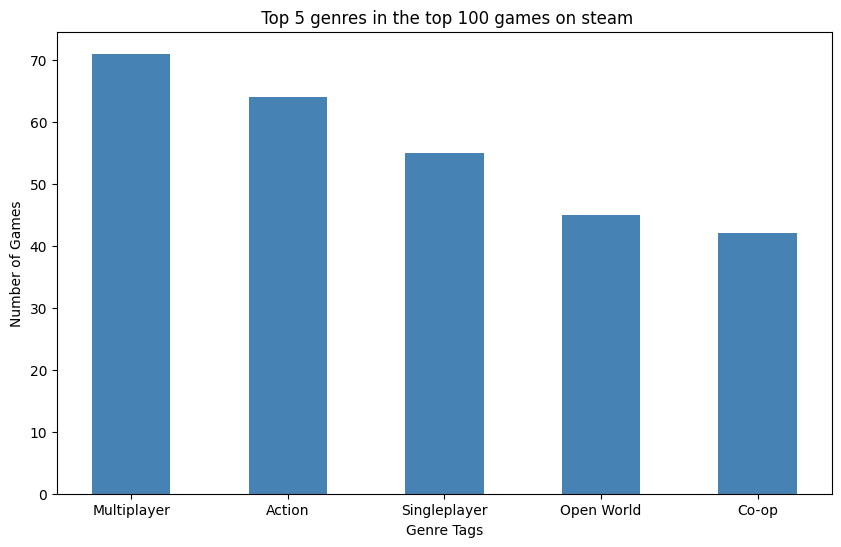

In [48]:


fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title(" Top 5 genres in the top 100 games on steam")
ax.set_xlabel("Genre Tags")
ax.set_ylabel("Number of Games")
ax.bar (genre_counts.index,genre_counts.values, color='steelblue',width=0.5)